# by Adam Larsen

#### Importing Libraries

Importing various libraries that we'll be looking to use throughout the data cleaning and visualization process for the IMDB datasets.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# This was very helpful in pulling in all the IMDB datasets without having to
# refer back to the project information.

!ls zippedData

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [7]:
df_tb = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_tr = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_tc = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df_ta = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df_tp = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df_nb = pd.read_csv('zippedData/imdb.name.basics.csv.gz')


In [8]:
df_tr.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
df_tb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
df_tc.head(5)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [11]:
df_ta.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [12]:
df_tp.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [13]:
df_nb.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [14]:
df_combined = df_tb.join(df_tr, how='inner', lsuffix='_tb')
df_combined

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21
...,...,...,...,...,...,...,...,...,...
73851,tt4206656,MarchFourth Marching Band in China,MarchFourth Marching Band in China,2014,66.0,"Documentary,Music",tt9805820,8.1,25
73852,tt4206658,El Bumbún,El Bumbún,2014,85.0,Drama,tt9844256,7.5,24
73853,tt4206724,70 Acres in Chicago: Cabrini Green,70 Acres in Chicago: Cabrini Green,2014,53.0,"Documentary,History,News",tt9851050,4.7,14
73854,tt4207014,Amante de lo ajeno,Amante de lo ajeno,2012,99.0,Drama,tt9886934,7.0,5


In [15]:
df_combined.sort_values(by='averagerating', ascending=False)


,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
27644,tt2083374,The Revolutionary Optimists,The Revolutionary Optimists,2013,95.0,"Documentary,Drama",tt8730716,10.0,5
8992,tt1537321,The Middle Men,The Middle Men,2010,70.0,"Biography,Documentary",tt1770682,10.0,5
26153,tt2043900,Last Call at the Oasis,Last Call at the Oasis,2011,105.0,Documentary,tt2632430,10.0,5
65033,tt3719158,Atomic Heart Mother,Madar-e ghalb atomi,2015,97.0,"Drama,Fantasy",tt9715646,10.0,20
57679,tt3360280,Chal Dhar Pakad,Chal Dhar Pakad,2010,129.0,Drama,tt5344358,10.0,6
...,...,...,...,...,...,...,...,...,...
50971,tt3020618,Vampire Guitar: A High Vaultage Adventure,Vampire Guitar: A High Vaultage Adventure,2013,86.0,Comedy,tt6017238,1.0,21
32440,tt2219896,Alice,Alice,2012,82.0,Drama,tt2087999,1.0,7
36456,tt2330308,Fast Forward,Fast Forward,2012,NaN,"Drama,Sci-Fi",tt1896768,1.0,21
54856,tt3219610,Faberge: A Life of Its Own,Faberge: A Life of Its Own,2014,87.0,"Documentary,History",tt1976600,1.0,436


####

Looks like there are a lot of inconsistencies across the data meaning 

In [16]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst_tb        73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73853 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  61529 non-null  float64
 5   genres           72066 non-null  object 
 6   tconst           73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.6+ MB


Once we've combined the two data sets that combined the primary keys (tconst_tb), we can see that there is missing data across 3 columns: original title, runtime_minutes and genres.

1) Original Title - I'm not concerned with the original title missing data because it seems as if this data either matches the primary title OR is an original title that was then changed when the film went to market. In a bit of research here, it looks like the title changed most frequently due to when the film might have debued in a non-US/foreign market. AL to write code to show this data.

2) Runtime_minutes might make sense to create a second table that shows runtime to ratings and see if there is a correlation between rating and runtime_minutes. I don't envision there to be a correlation however we should check to see if that is something that can occur.

3) Genre - I need to check to see if data in any other IMDB tables has this type of data for the same variable. If not, I am going to remove those values when blank.

## Cleaning Up Genres

I think it makes sense, given it's only ~1k missing values, to drop the records entirely. We did have the thought of trying to join other tables with similar data however the sample size of those data sets, most noticeably are ~1.5k records which most likely will not have any impact on our missing records.

We could test this later to give actual values.

In [17]:
df_combined.dropna(subset=['genres'], inplace=True)

Now that we have a clean list of genres, we should now see what are all the unique genre values within the column, not taking into account the different permutations such as Comedy, Drama and Drama, Horror. I'd expect there to be 3 unique values: Comedy, Drama and Horror.

In [18]:
gen_unique = list((df_combined['genres']))
len(gen_unique)

genre_list_total = []
unique_gen = []
total_genre = []
a = []
b = []
c = []

for genre in gen_unique:
    genre_list_total.append(genre.split(","))
     
print((genre_list_total)[0])
len((genre_list_total))

df_combined['genre_unique'] = genre_list_total  

for x in genre_list_total:
    total_genre = total_genre + x

unique_gen = list(set(total_genre))
unique_gen

['Action', 'Crime', 'Drama']


['Thriller',
 'Adventure',
 'Fantasy',
 'Adult',
 'Comedy',
 'Mystery',
 'News',
 'Family',
 'Drama',
 'Talk-Show',
 'Sport',
 'Biography',
 'Romance',
 'Sci-Fi',
 'Crime',
 'Musical',
 'Animation',
 'Horror',
 'Action',
 'Reality-TV',
 'Documentary',
 'Western',
 'Music',
 'Short',
 'Game-Show',
 'War',
 'History']

In [19]:
genre_action = df_combined[df_combined['genres'].str.contains('Action')].mean()
genre_action


start_year         2013.218513
runtime_minutes      98.508426
averagerating         6.330145
numvotes           3273.718341
dtype: float64

In [20]:
ratings = {}

for x in unique_gen:
    y = df_combined[df_combined['genres'].str.contains(x)].mean().values[2]
    ratings[x]= y


# print(ratings)  

In [21]:
df_ratings = pd.DataFrame.from_dict(ratings, orient='index')
df_ratings = df_ratings.reset_index()
df_ratings = df_ratings.sort_values(([0]), ascending=False)
df_ratings

,index,0
9,Talk-Show,6.425000
21,Western,6.391852
26,History,6.356450
12,Romance,6.354530
6,News,6.352423
7,Family,6.341300
1,Adventure,6.339527
10,Sport,6.338381
11,Biography,6.338265
22,Music,6.337761


## Charting Genre vs. Rating

Time to graph the genres by ratings to see what genres people enjoy the most.

The first graph I'd like to take a look at would be the overall genre vs. rating, not splitting the data down into sections by year, especially the last 5-10 years to see if that changes the data at all. It's hard to assume that past data will predict future especially in movies however we can use that as a starting point.

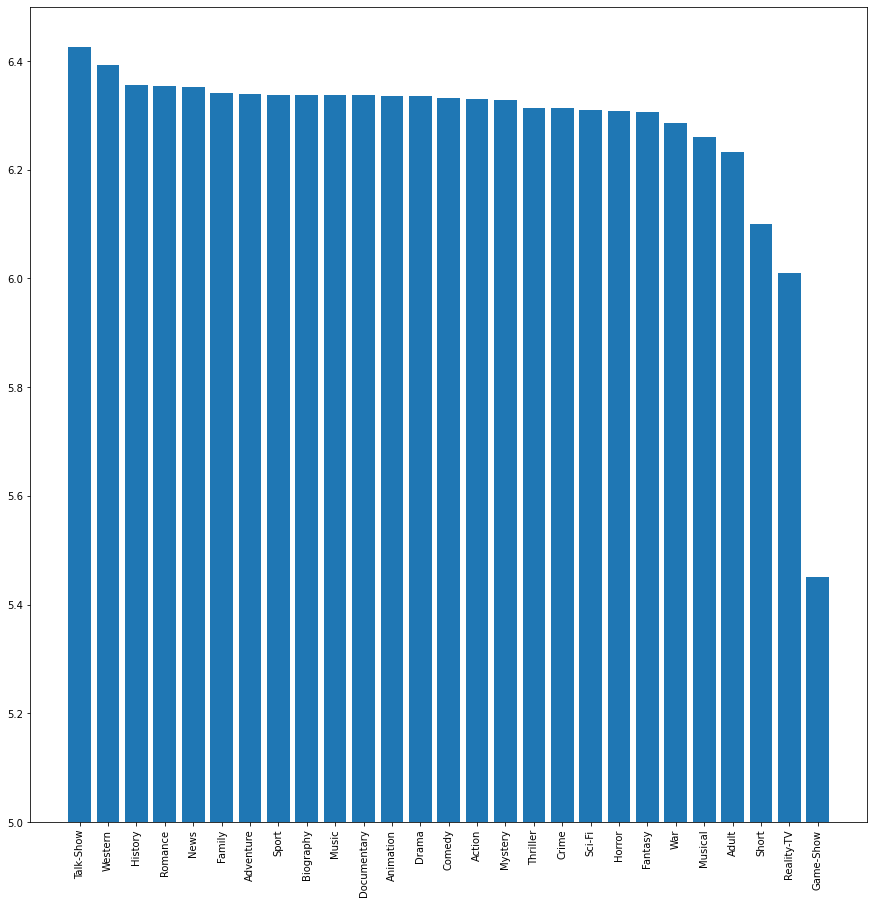

In [22]:
fig3, ax = plt.subplots(figsize =(15,15))

n = df_ratings['index']
m = df_ratings[0]
ax.set_ylim(5, 6.5)
plt.xticks(rotation=90)

ax.bar(n, m);


Trying to see the data if we reduce the number of votes so that they have to be greater than the mean of the original data set to avoid skewness as well as make the data more recent.

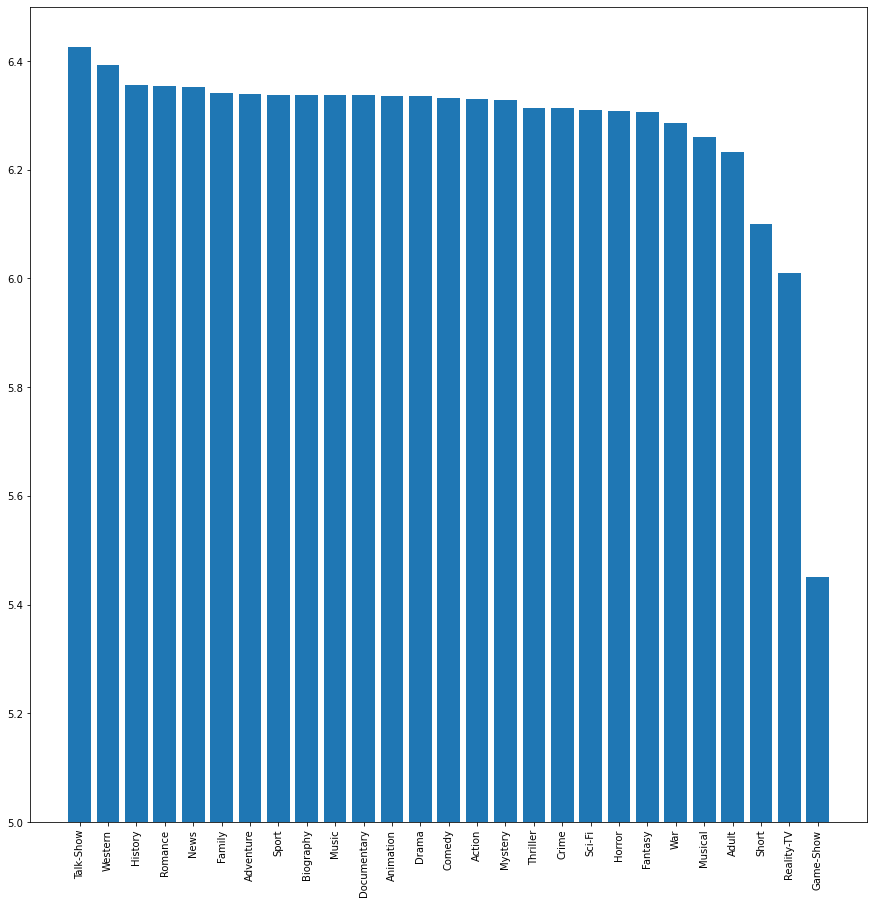

In [23]:
df_smallerdata = df_combined[(df_combined['numvotes'] > 100) & (df_combined['start_year'] > 2015)] 
df_smallerdata.head()

ratings_smaller = {}

for ab in unique_gen:
    bc = df_smallerdata[df_smallerdata['genres'].str.contains(ab)].mean().values[2]
    ratings_smaller[ab]= bc

    
fig3, ax = plt.subplots(figsize =(15,15))

abc = df_ratings['index']
bcd = df_ratings[0]
ax.set_ylim(5, 6.5)
plt.xticks(rotation=90)
ax.bar(abc, bcd);

It's clear that we have some 'genres' included in the IMDB movie data that are more closely aligned with TV shows. Some of this data would be: Talk-show, News, Reality-TV, Game-Show. 

Indices of Talk-Show (9), News (25), Reality-TV (14) and Game-show (21).

In [24]:
df_only_movies = df_ratings.drop([9, 25, 14, 21])

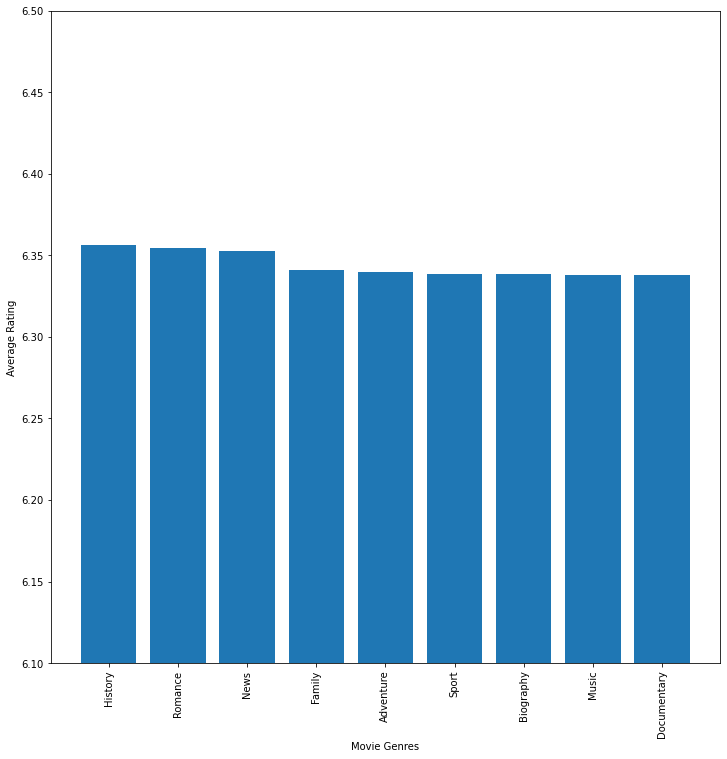

In [25]:
fig3, ax = plt.subplots(figsize =(12,12))

abcd = df_only_movies['index'][:9]
defg = df_only_movies[0][:9]
ax.set_ylim(6.1, 6.5)
plt.xticks(rotation=90)
ax.bar(abcd, defg)
ax.set_xlabel('Movie Genres')
ax.set_ylabel('Average Rating');

## Cleaning Up Original Title

In the original data set, there were only 3 titles that were missing. Turns out that when we dropped all the data that didn't include a genre, whether that was due to not having one classified during production OR it just being missing data in general, those 3 records records were removed as well. We infact didn't need to take action here and can begin charting to draw conclusions. 

## Charting Runtime vs. Rating

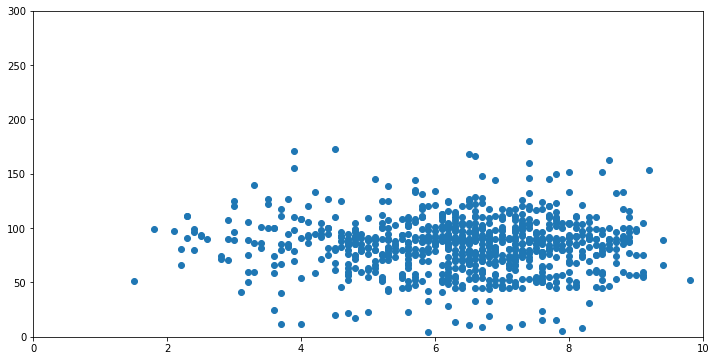

In [26]:
## Graphing the data analysis between runetime and averagerating 
## before cleaning up to get an idea of the data.

x = df_combined['runtime_minutes'].sample(1000)
y = df_combined['averagerating'].sample(1000)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 300)
ax.set_xlim(0, 10)

ax.scatter(y,x);

## I'm definitely not happy with this graph but it kind of shows that there are ALL ranges
## of scores across all different movie lengths. A relatively flat scatter plot like
## the below indicates there is very little or no correlation between
## the runtime and rating.

In [27]:
## Cleaning up runtime data
## In this scenario, I think it'd make sense to change the 12k null values to the mean
## runtime to see how this impacts our graphs.

In [28]:
df_combined['runtime_minutes_mean'] = df_combined['runtime_minutes'].fillna(value=df_combined['runtime_minutes'].mean().astype(float))

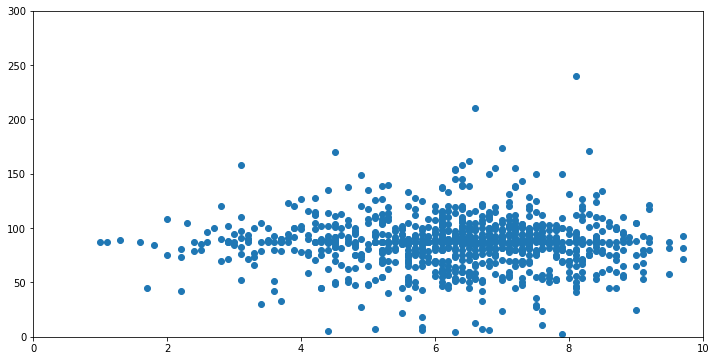

In [29]:
rt = df_combined['runtime_minutes_mean'].sample(1000)
ar = df_combined['averagerating'].sample(1000)

fig1 , ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 300)
ax.set_xlim(0, 10)

ax.scatter(ar, rt);

As we can see from the two above graphs, there isn't much of a difference between the two different data sets when we use the mean for the missing value. It's clear that there is a flat distribution meaning no correlation between run time and rating received so therefore it would be a great recommendation to Microsoft that they should not worry about the runtime and focus on the story being told.


In [34]:
df_adventure = df_combined[((df_combined['genres'].str.contains('Fantasy') & (df_combined['genres'].str.contains('Adventure'))))]

In [37]:
df_adventure.sort_values(['averagerating'], ascending=False)

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes,genre_unique,runtime_minutes_mean
54115,tt3181962,The Last Shepherd,The Last Shepherd,2015,94.0,"Adventure,Comedy,Fantasy",tt4131686,9.6,1339,"[Adventure, Comedy, Fantasy]",94.000000
4796,tt10436054,Kekkai Sensen,Kekkai Sensen,2019,NaN,"Action,Adventure,Fantasy",tt2064724,9.2,6,"[Action, Adventure, Fantasy]",86.745407
43295,tt2579538,Boondocks,Boondocks,2013,63.0,"Adventure,Fantasy,Thriller",tt3976202,8.9,23,"[Adventure, Fantasy, Thriller]",63.000000
52811,tt3117746,The Snow Queen,The Snow Queen,2013,90.0,"Action,Adventure,Fantasy",tt3733932,8.9,9,"[Action, Adventure, Fantasy]",90.000000
12922,tt1673434,The Twilight Saga: Breaking Dawn - Part 2,The Twilight Saga: Breaking Dawn - Part 2,2012,115.0,"Adventure,Drama,Fantasy",tt2959606,8.9,8,"[Adventure, Drama, Fantasy]",115.000000
...,...,...,...,...,...,...,...,...,...,...,...
9829,tt1577072,The Beast of Bottomless Lake,The Beast of Bottomless Lake,2010,105.0,"Adventure,Comedy,Fantasy",tt0887143,2.8,952,"[Adventure, Comedy, Fantasy]",105.000000
42791,tt2557172,The Grave Bandits,The Grave Bandits,2012,100.0,"Adventure,Comedy,Fantasy",tt2644690,2.5,16,"[Adventure, Comedy, Fantasy]",100.000000
54847,tt3219396,101 Secrets,101 Secrets,2015,95.0,"Adventure,Drama,Fantasy",tt1954877,2.2,37,"[Adventure, Drama, Fantasy]",95.000000
8638,tt1520498,The Oogieloves in the Big Balloon Adventure,The Oogieloves in the Big Balloon Adventure,2012,88.0,"Adventure,Family,Fantasy",tt6632338,2.1,13,"[Adventure, Family, Fantasy]",88.000000
